# Определение сегментов покупателей

Датасет состоит из данных о покупателей сети супермаркетов. Данные взяты из курса «Udemy's Machine Learning A-Z course»

__Задача:__ Определить сегменты покупателей

__CustomerID:__ ID клиента

__Gender:__ Пол клиента

__Age:__ Возраст клиента

__Annual Income (k$):__ Годовой доход клиента

__Spending Score (1-100):__ Оценка расходов (метрика магазина)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Пропущенных значений нет
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
#Исходим из гипотезы, что нужно сегментировать покупатлей по Annual Income и Spending Score 
X = dataset[['Annual Income (k$)','Spending Score (1-100)']].values

## K-means

Сначала используем алгоритм К-means

In [16]:
from sklearn.cluster import KMeans

#Чтобы определить оптимальное К (кол-во кластеров), воспользуемся Elbow method
#Переберем возможные К от 1 до 11
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

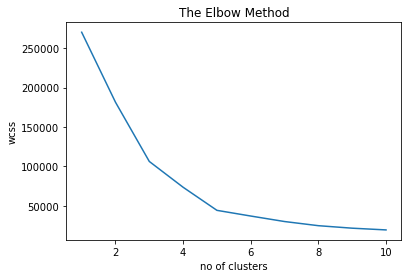

In [17]:
#Отрисуем график результатов
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Визульно можно определить, что оптимальное число кластеров 5

In [35]:
#Обучим модель с 5 кластерами и сделаем классификацию
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

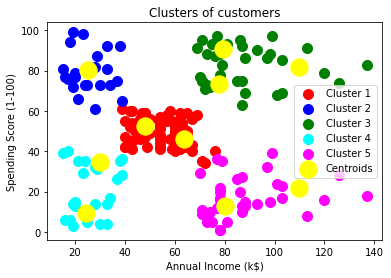

In [46]:
#Выведем рисунок с кластерами
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Таким образом, мы получили 5 сегментов в зависимости от Annual Income и Spending Score. 

## Hierarchical agglomerative clustering

Выполним ту же задачу, но с помощью hierarchical agglomerative clustering.

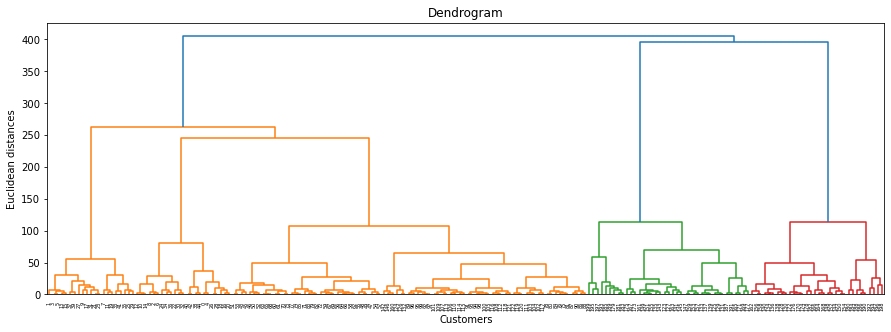

<Figure size 1080x360 with 0 Axes>

In [58]:
#Нарисуем дендограмму
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.figure(figsize=(15,5))
plt.show()

По дендограмме можно выделить 5 кластеров.

In [59]:
#Обучим модель с 5 кластерами и сделаем классификацию
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

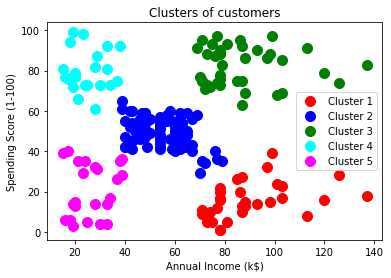

In [60]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Получились те же 5 кластеров, однако несколько покупателей при использовании этого алгоритма классифицировались не в первом кластере, а во втором кластере.